In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the Titanic dataset
file_path = 'C:/Users/Suvarna/Downloads/archive (1)/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)


In [3]:
# Data Cleaning
# Fill missing Age values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common port ('S')
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column since it has many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Check for missing values after cleaning
print("Missing values in each column after cleaning:")
print(titanic_data.isnull().sum())


Missing values in each column after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


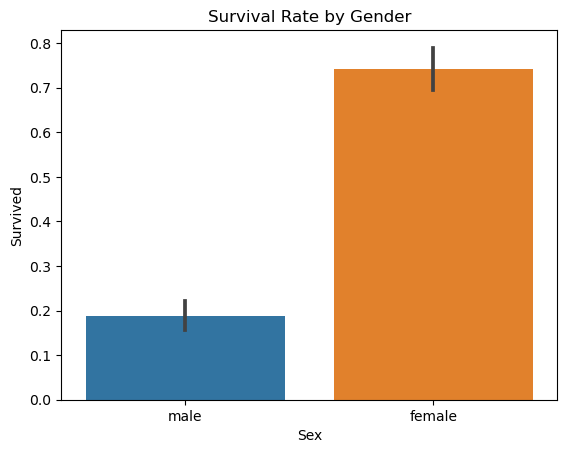

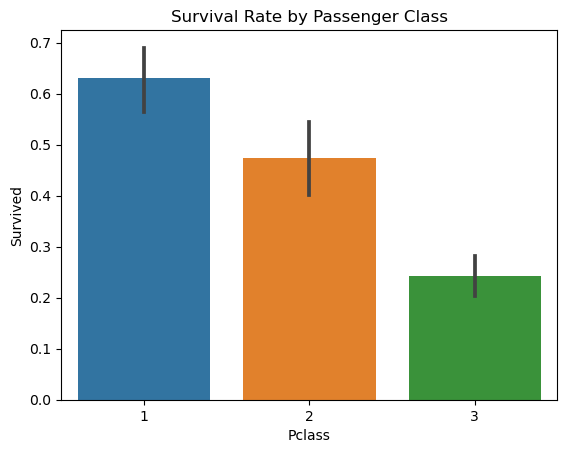

In [4]:
# Exploratory Analysis
# Visualize survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

# Visualize survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [5]:
# Convert categorical variables ('Sex' and 'Embarked') to dummy variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Define features (X) and target (y)
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 81.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

